In [1]:
!pip install python-whois
import pandas as pd
import numpy as np
import requests
import re
from bs4 import BeautifulSoup
from datetime import datetime
from bs4 import Comment
import whois
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
from urllib.parse import urlparse

In [2]:
cronos=pd.read_csv("cronos_duration.csv")
legit=pd.read_csv("whoisLegi.csv")
cronos=cronos.drop(columns=['Unnamed: 0'],axis=1)
legit=legit.drop(columns=['Unnamed: 0'],axis=1)
for i in range(len(cronos.duration)):
  cronos.duration[i]=int(cronos.duration[i].split()[0])
for i in range(len(legit.duration)):
  legit.duration[i]=int(legit.duration[i].split()[0])
leg=list(legit.duration)
cro=list(cronos.duration)
leg=sorted(leg)
cro=sorted(cro)

In [3]:
for i in range(len(leg)):
  leg[i]=[leg[i],1]
for i in range(len(cro)):
  cro[i]=[cro[i],0]
a=leg+cro
a=sorted(a)
k=pd.DataFrame(a,columns=['duration','result'])

###Naive Bayes

In [ ]:
#Too less attributes for x thereby less accuracy
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  mnb = MultinomialNB().fit(x_train, y_train)
  print(i/10)
  print("score on train: "+ str(mnb.score(x_train, y_train)))
  print("score on test: " + str(mnb.score(x_test, y_test)))

0.1
score on train: 0.5066977285963891
score on test: 0.5497382198952879
0.2
score on train: 0.5091743119266054
score on test: 0.518324607329843
0.3
score on train: 0.505054286783976
score on test: 0.5248908296943231
0.4
score on train: 0.5124508519003932
score on test: 0.5088408644400786
0.5
score on train: 0.5062893081761006
score on test: 0.5157232704402516
0.6
score on train: 0.5242463958060288
score on test: 0.5021834061135371
0.7
score on train: 0.5078671328671329
score on test: 0.4809131736526946
0.8
score on train: 0.5307994757536042
score on test: 0.506059613494923
0.9
score on train: 0.5275590551181102
score on test: 0.509170305676856


##Logistic

In [ ]:
#Shows overfitting at times accd to website looks fine to me
from sklearn.linear_model import LogisticRegression
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  lr=LogisticRegression(max_iter=1000)
  lr.fit(x_train, y_train)
  print(i/10)
  print("score on train: "+ str(lr.score(x_train, y_train)))
  print("score on test: " + str(lr.score(x_test, y_test)))

0.1
score on train: 0.8506115317414095
score on test: 0.8534031413612565
0.2
score on train: 0.8519003931847968
score on test: 0.8468586387434555
0.3
score on train: 0.8513665293897417
score on test: 0.8489082969432314
0.4
score on train: 0.8575797291393622
score on test: 0.8408644400785854
0.5
score on train: 0.840146750524109
score on test: 0.8611111111111112
0.6
score on train: 0.8486238532110092
score on test: 0.8519650655021834
0.7
score on train: 0.8618881118881119
score on test: 0.8458083832335329
0.8
score on train: 0.8650065530799476
score on test: 0.8467081559122175
0.9
score on train: 0.8241469816272966
score on test: 0.8532751091703057


##KNN

In [ ]:
#shows overfitting tendencies
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
  knn.fit(x_train, y_train)
  print(i/10)
  print("train shape: " + str(x_train.shape))
  print("score on train: "+ str(knn.score(x_train, y_train)))
  print("score on test: " + str(knn.score(x_test, y_test)))

0.1
train shape: (3434, 1)
score on train: 0.8759464181712289
score on test: 0.8769633507853403
0.2
train shape: (3052, 1)
score on train: 0.8577981651376146
score on test: 0.8507853403141361
0.3
train shape: (2671, 1)
score on train: 0.8828154249344815
score on test: 0.8908296943231441
0.4
train shape: (2289, 1)
score on train: 0.8719965050240279
score on test: 0.8696791093647676
0.5
train shape: (1908, 1)
score on train: 0.8663522012578616
score on test: 0.8810272536687631
0.6
train shape: (1526, 1)
score on train: 0.8715596330275229
score on test: 0.8930131004366813
0.7
train shape: (1144, 1)
score on train: 0.8837412587412588
score on test: 0.875748502994012
0.8
train shape: (763, 1)
score on train: 0.8951507208387942
score on test: 0.8820831968555519
0.9
train shape: (381, 1)
score on train: 0.7401574803149606
score on test: 0.719650655021834


##SVM

In [ ]:
#Accuracy varies a loot for different splits
from sklearn.svm import LinearSVC
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  svm=LinearSVC(C=0.01,max_iter=10000)
  svm.fit(x_train, y_train)
  print(i/10)
  print("score on train: "+ str(svm.score(x_train, y_train)))
  print("score on test: " + str(svm.score(x_test, y_test)))  

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1
score on train: 0.488351776354106
score on test: 0.49476439790575916


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.2
score on train: 0.4813237221494102
score on test: 0.5196335078534031


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.3
score on train: 0.8255335080494197
score on test: 0.8576419213973799


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4
score on train: 0.8409785932721713
score on test: 0.8258022265880812


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5
score on train: 0.850104821802935
score on test: 0.870020964360587


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.6
score on train: 0.4849279161205767
score on test: 0.49170305676855897


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7
score on train: 0.833916083916084
score on test: 0.8154940119760479
0.8
score on train: 0.8519003931847968
score on test: 0.7988863413036358
0.9
score on train: 0.89501312335958
score on test: 0.8558951965065502


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##DecisionTree

0.1
score on train: 0.8931275480489226
score on test: 0.8900523560209425
0.2
score on train: 0.8931847968545217
score on test: 0.8861256544502618
0.3
score on train: 0.8962935230250842
score on test: 0.8751091703056768
0.4
score on train: 0.8964613368283093
score on test: 0.8775376555337263
0.5
score on train: 0.8867924528301887
score on test: 0.8852201257861635
0.6
score on train: 0.8905635648754915
score on test: 0.882532751091703
0.7
score on train: 0.888986013986014
score on test: 0.875374251497006
0.8
score on train: 0.9069462647444299
score on test: 0.8591549295774648
0.9
score on train: 0.9186351706036745
score on test: 0.8532751091703057


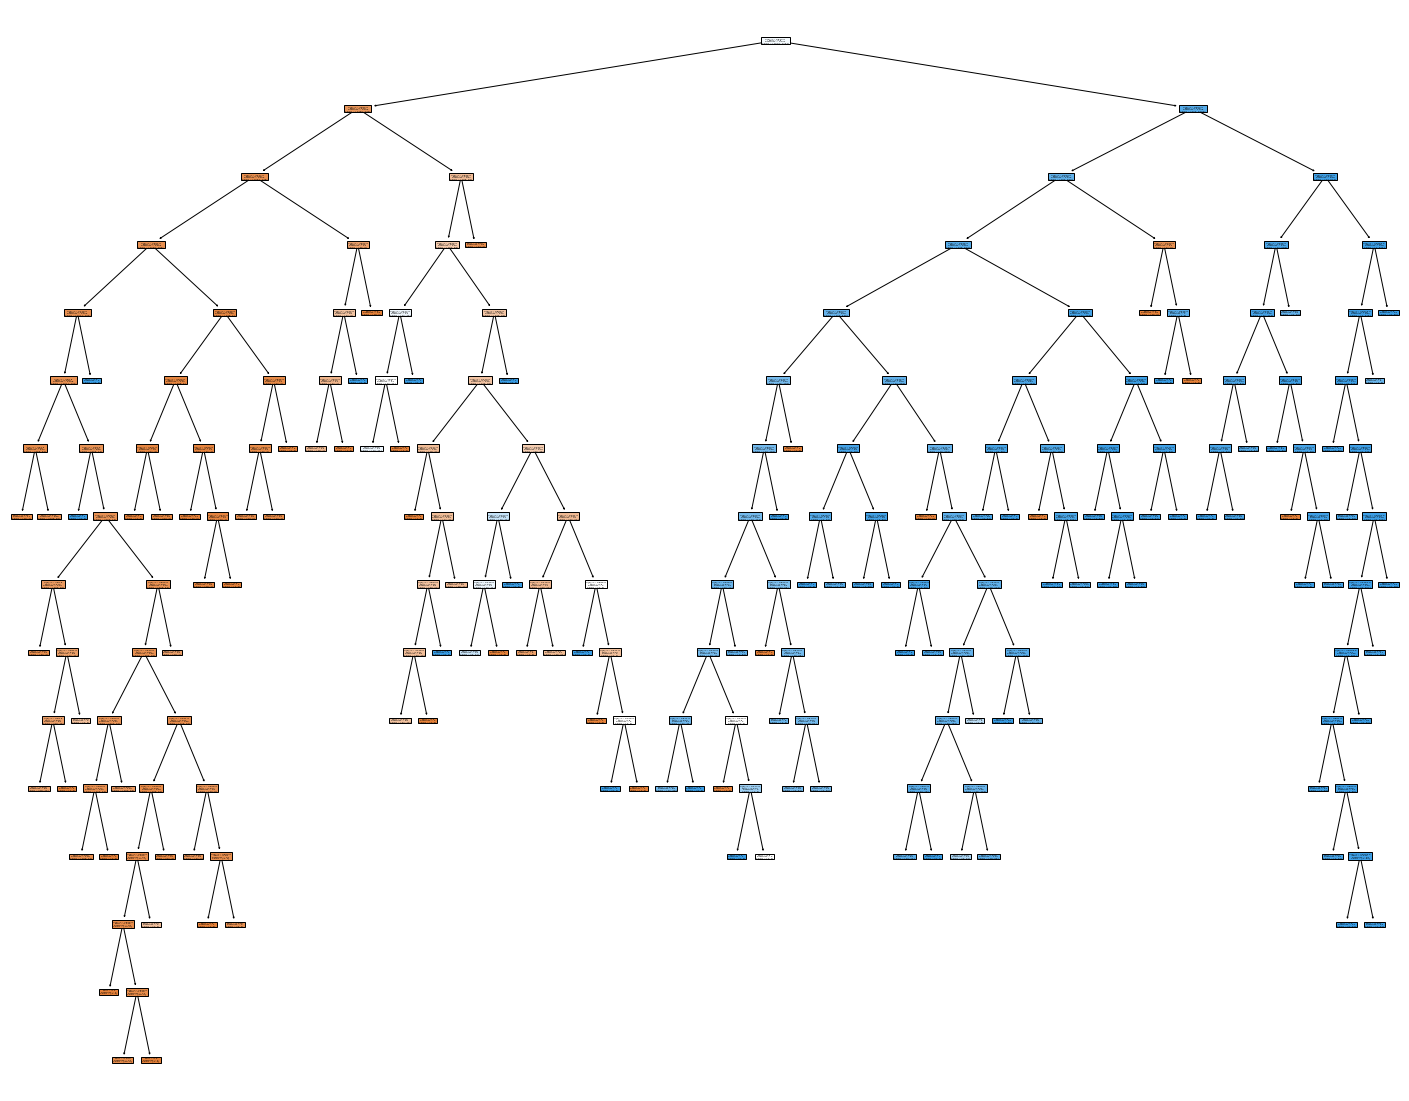

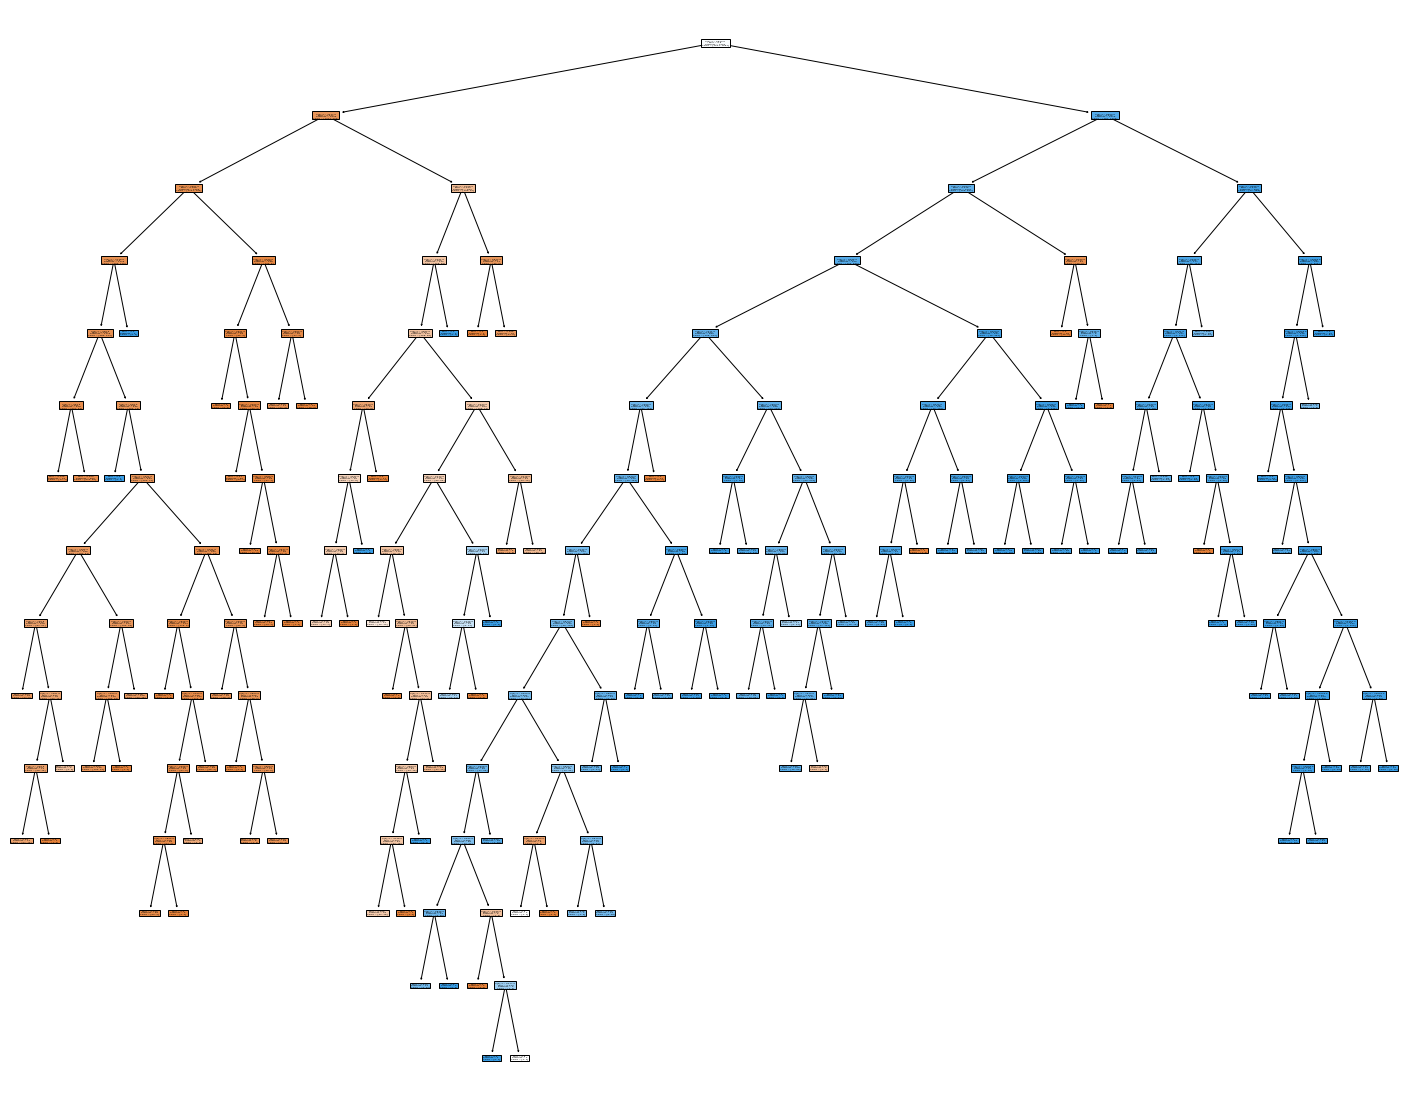

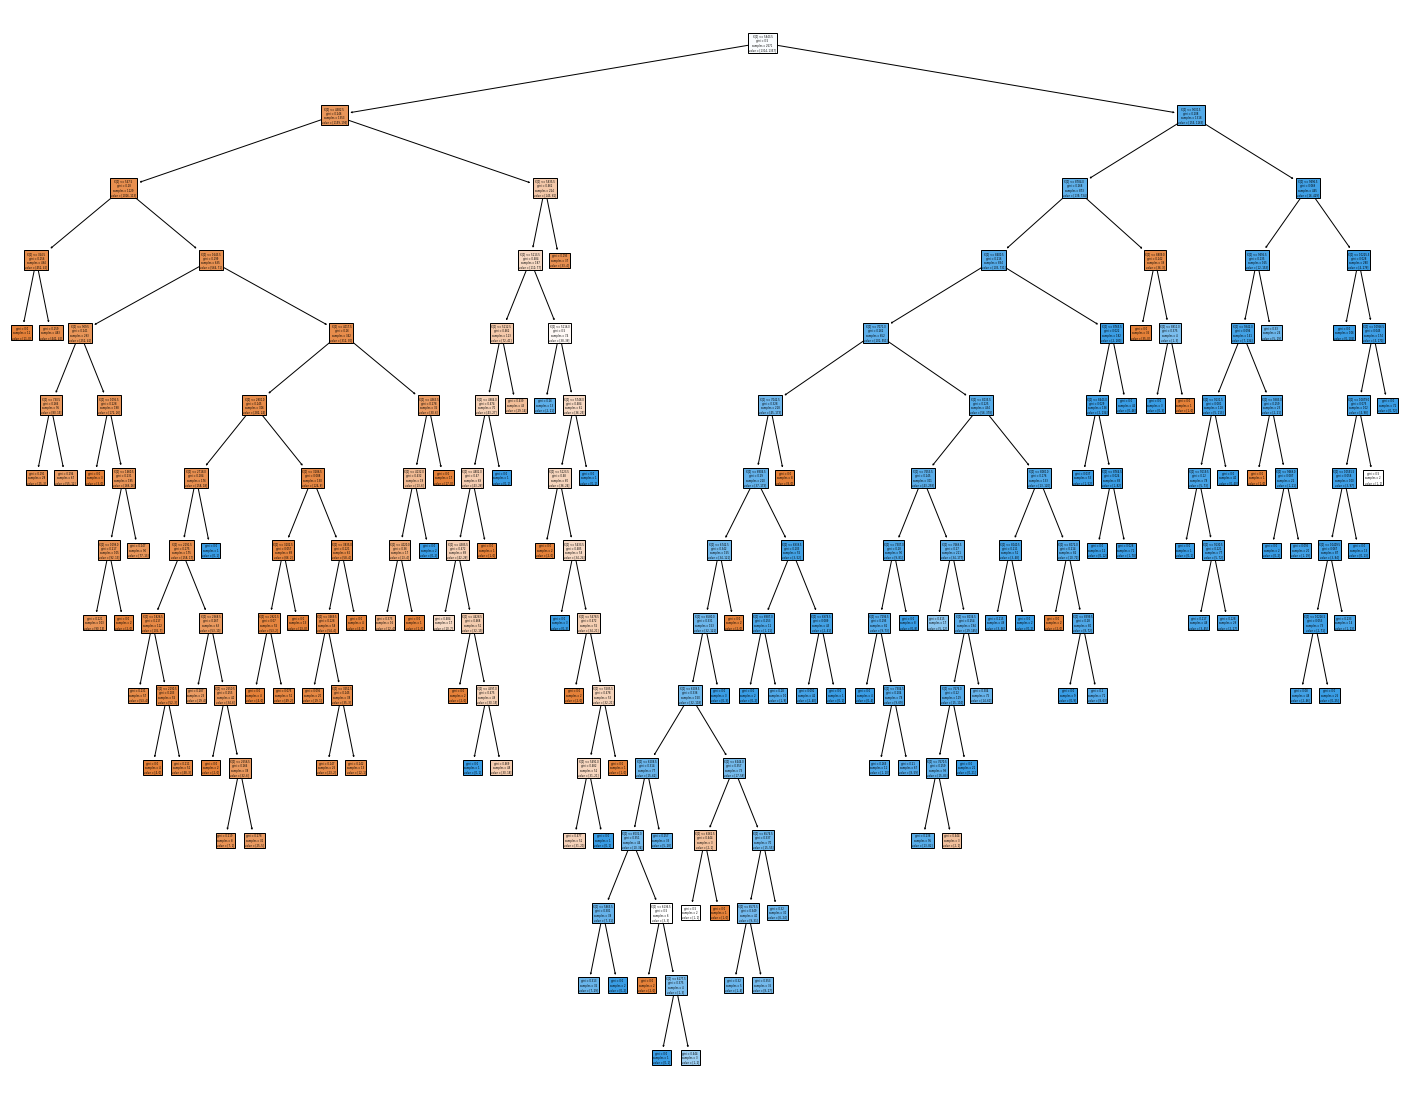

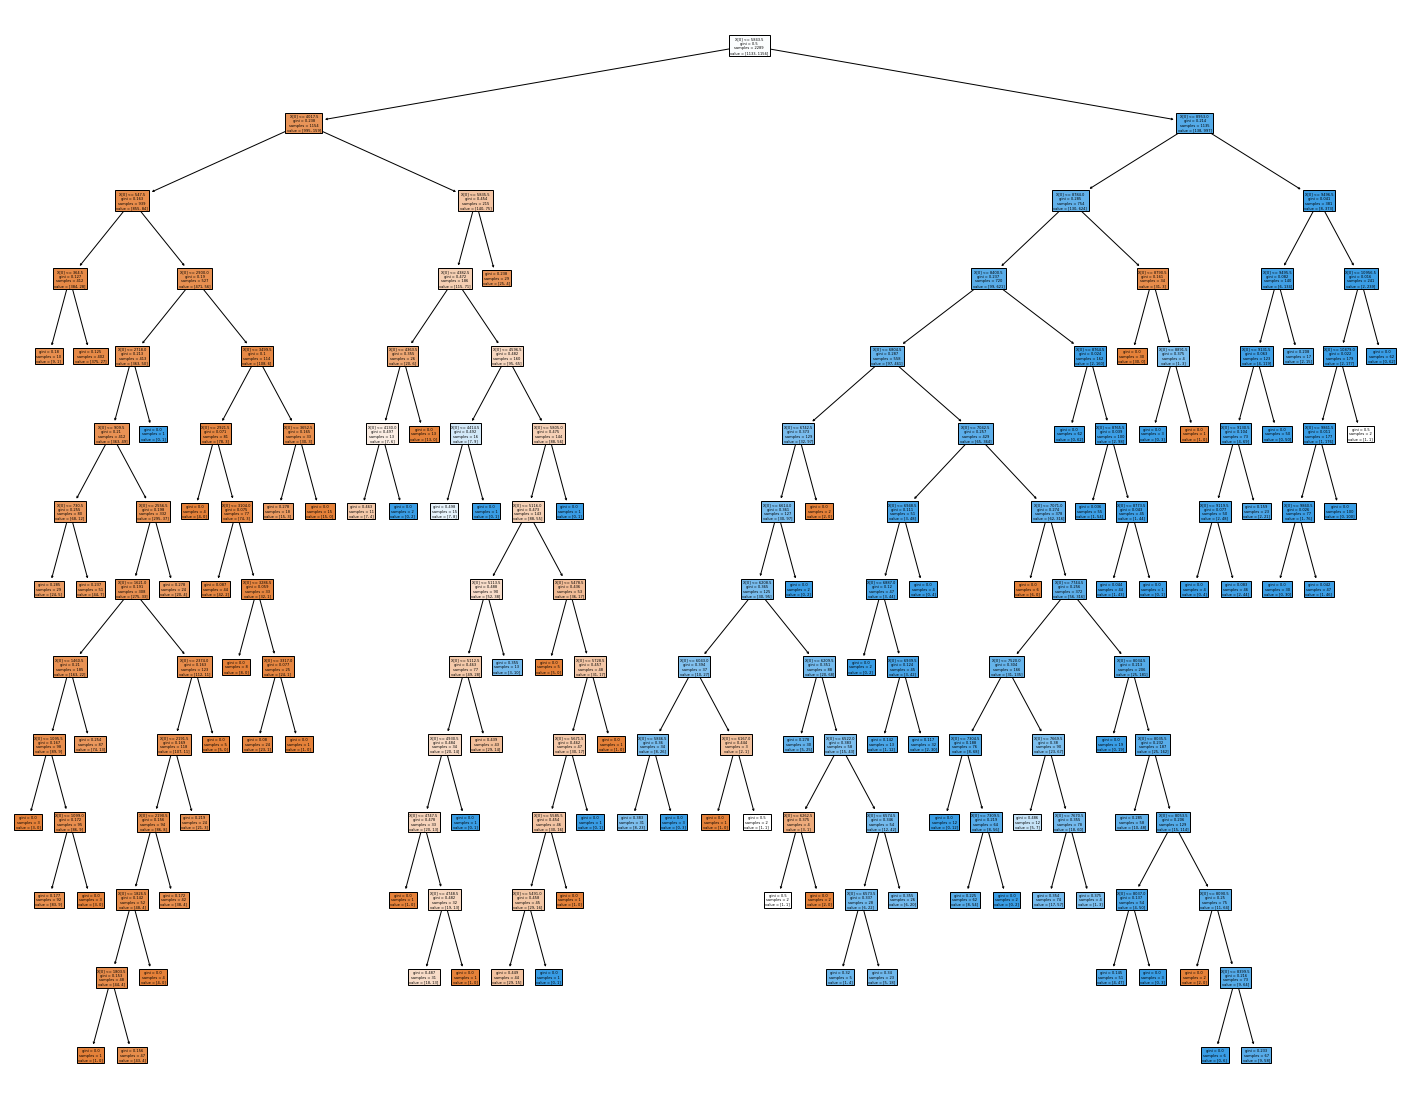

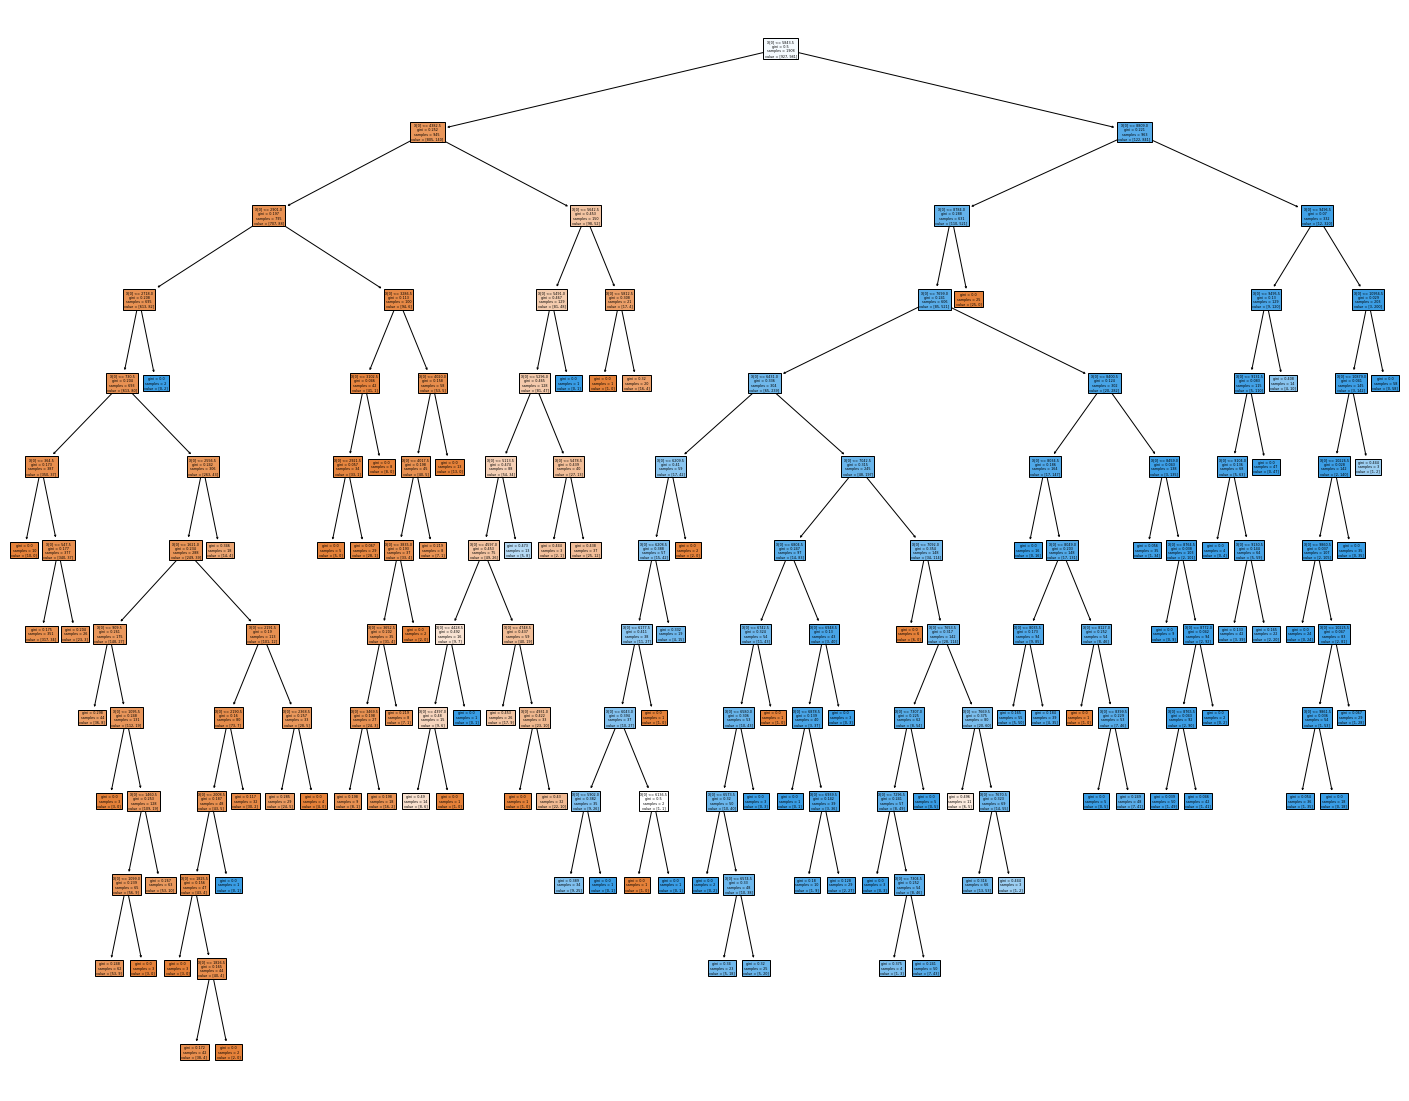

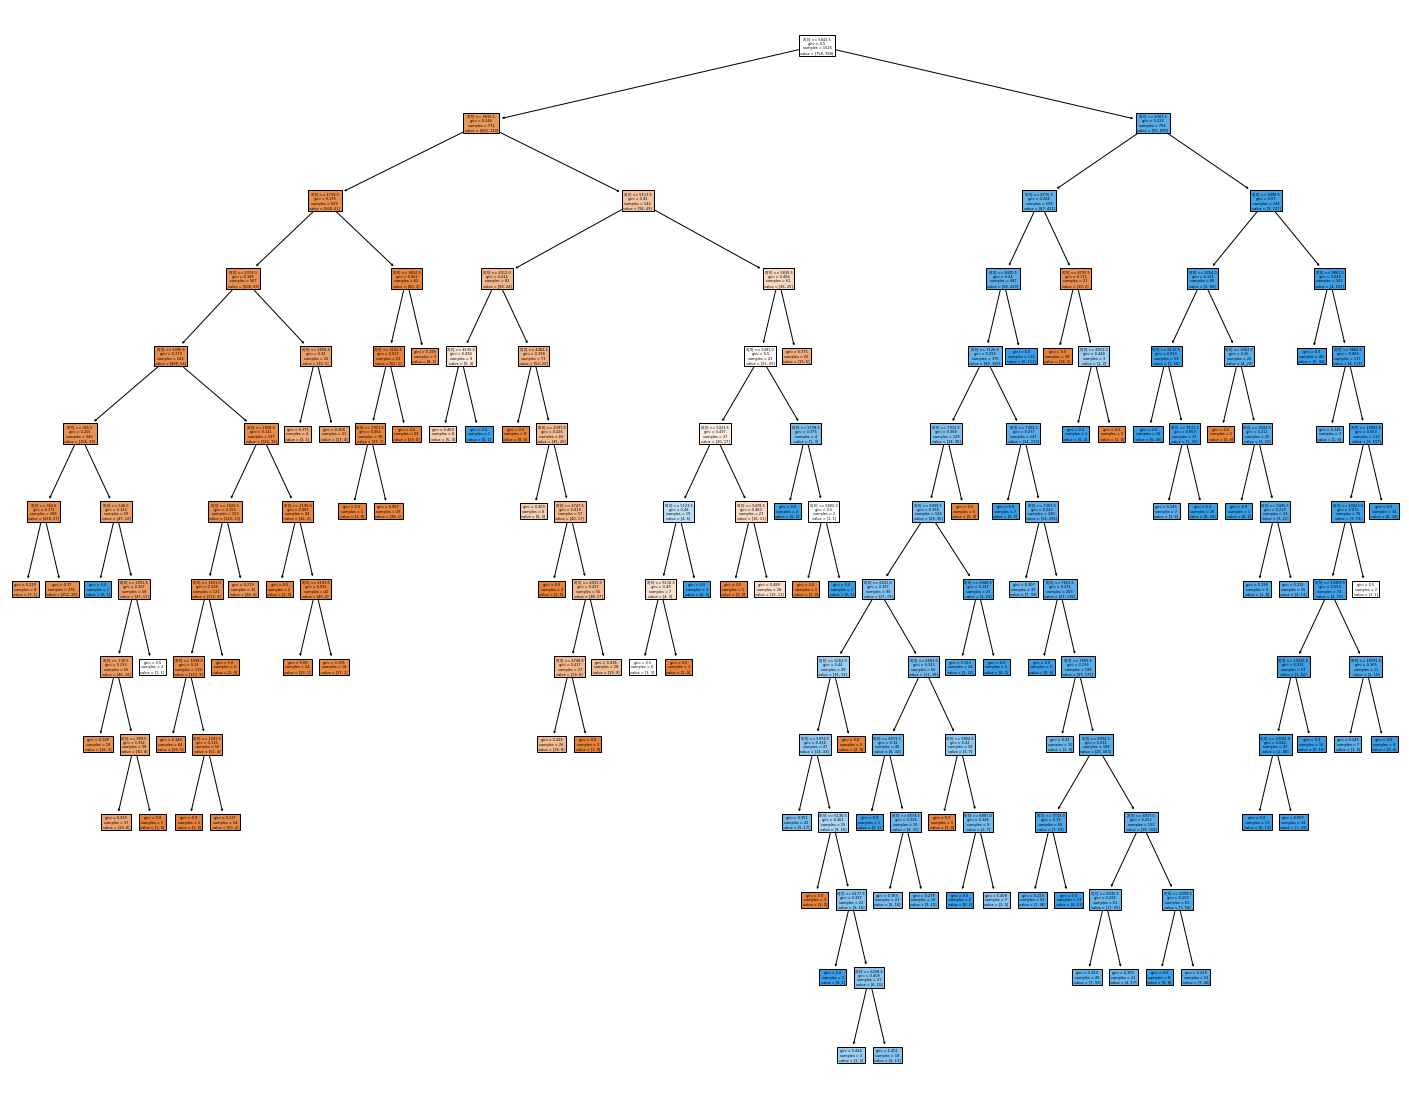

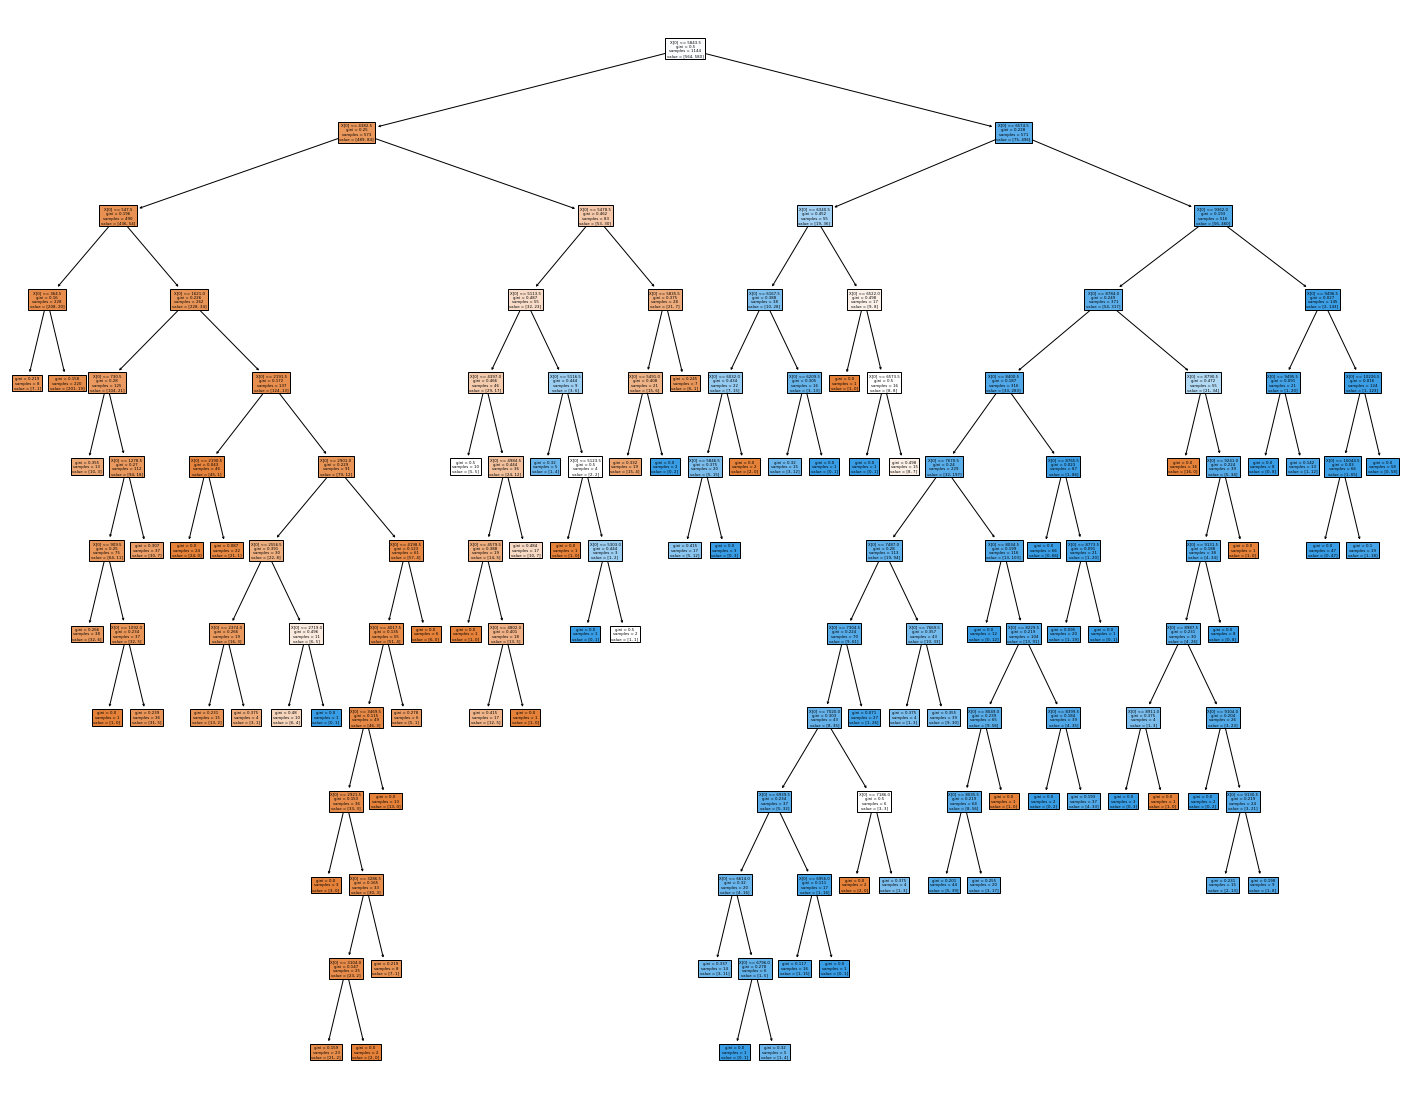

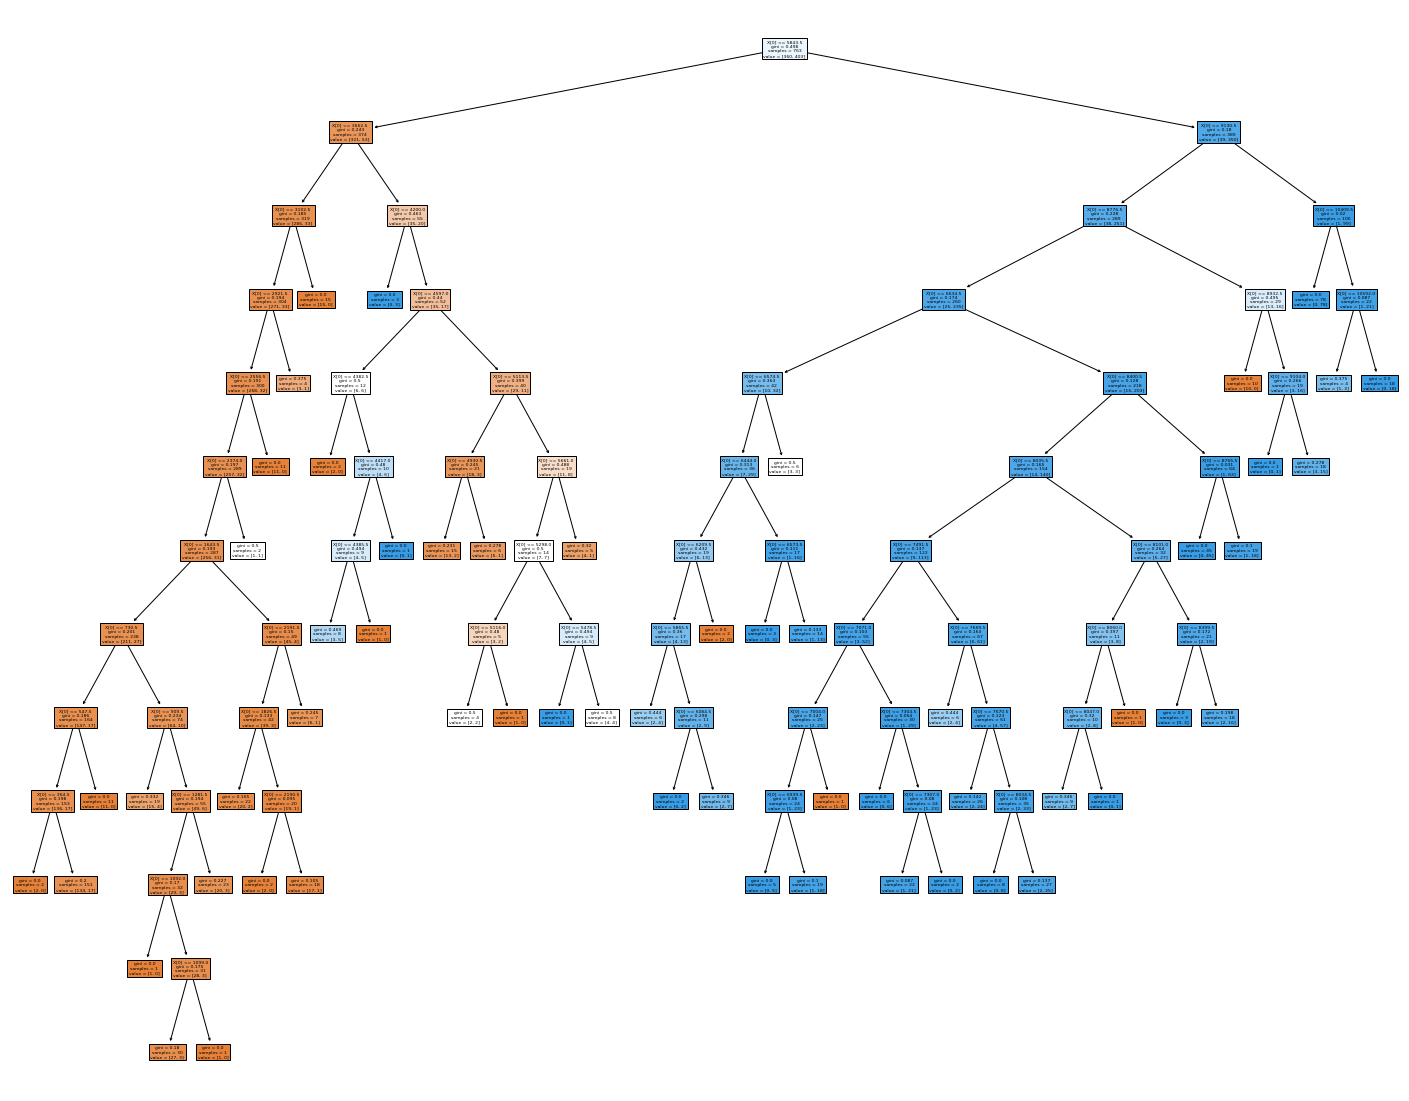

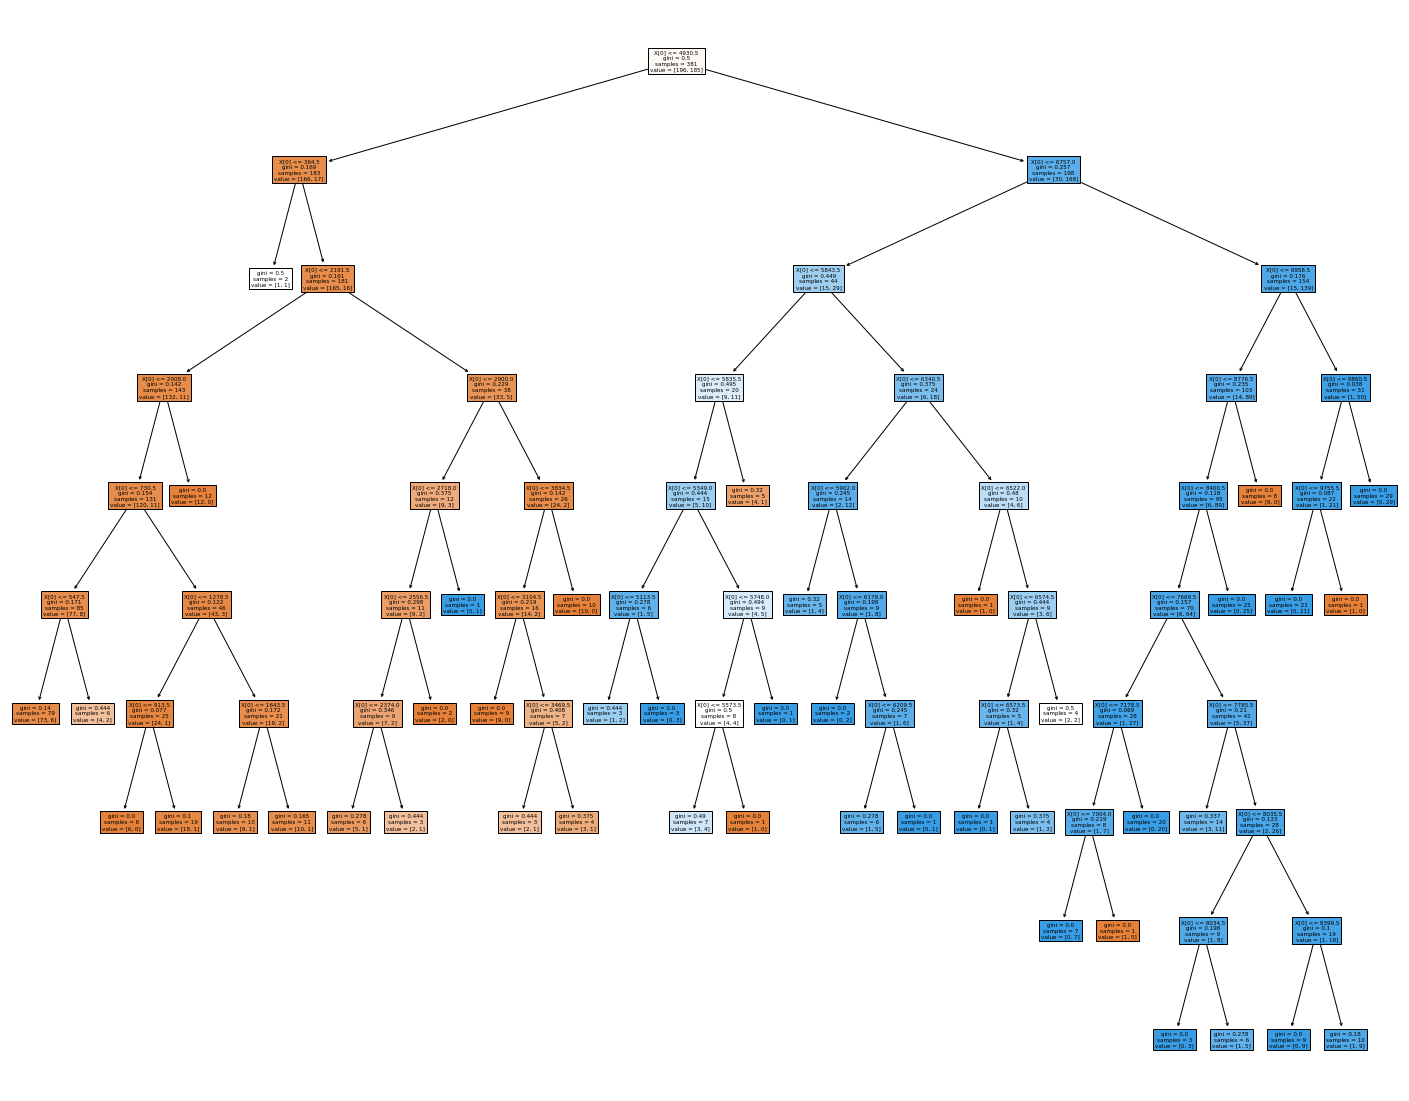

In [ ]:
#Looks like Overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  fig = plt.figure(figsize=(25,20))
  _ = tree.plot_tree(clf,filled=True)
  print(i/10)
  print("score on train: " + str(clf.score(x_train, y_train)))
  print("score on test: "  + str(clf.score(x_test, y_test)))

##Bagging Decision Tree Classifier

In [ ]:
#WTF is this someone please explain. Thanks!
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=5)
  bg.fit(x_train, y_train)
  print(i/10)
  print("score on train: "+ str(bg.score(x_train, y_train)))
  print("score on test: " + str(bg.score(x_test, y_test)))

0.1
score on train: 0.8905066977285964
score on test: 0.8848167539267016
0.2
score on train: 0.8889252948885976
score on test: 0.8835078534031413
0.3
score on train: 0.8906776488206665
score on test: 0.885589519650655
0.4
score on train: 0.8877238968982089
score on test: 0.885396201702685
0.5
score on train: 0.8862683438155137
score on test: 0.889412997903564
0.6
score on train: 0.891218872870249
score on test: 0.8759825327510917
0.7
score on train: 0.8802447552447552
score on test: 0.8772455089820359
0.8
score on train: 0.8794233289646134
score on test: 0.8797903701277432
0.9
score on train: 0.8766404199475065
score on test: 0.8716157205240175


##Random Forest

In [ ]:
#Looks Okay?
from sklearn.ensemble import RandomForestClassifier
for i in range(1,10):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=i/10)
  rf = RandomForestClassifier(n_estimators=30, max_depth=1)
  rf.fit(x_train, y_train)
  print(i/10)
  print("score on train: "+ str(rf.score(x_train, y_train)))
  print("score on test: " + str(rf.score(x_test, y_test)))

0.1
score on train: 0.8672102504368084
score on test: 0.8769633507853403
0.2
score on train: 0.8650065530799476
score on test: 0.8808900523560209
0.3
score on train: 0.8640958442530887
score on test: 0.8777292576419214
0.4
score on train: 0.8654434250764526
score on test: 0.8722986247544204
0.5
score on train: 0.8668763102725366
score on test: 0.8694968553459119
0.6
score on train: 0.8630406290956749
score on test: 0.8716157205240175
0.7
score on train: 0.8907342657342657
score on test: 0.8585329341317365
0.8
score on train: 0.8636959370904325
score on test: 0.8693088765149034
0.9
score on train: 0.868766404199475
score on test: 0.868122270742358


##Neural Networks! XO
####Ran for 3 combinations 0.2,0.3,0.33
####Best combinations for layers in order (123)

*   STS
*   SRS
*   TTS
*   TRS
*   RTS







In [ ]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
# split an additional validation dataset
fin=[]
for i in range(3,4):
  x_train,x_test,y_train,y_test=train_test_split(k[['duration']],k['result'], test_size=0.33)
  x_validation=x_train[:100]
  x_partial_train=x_train[100:]
  y_validation=y_train[:100]
  y_partial_train=y_train[100:]
  model=models.Sequential()
  for a in ['sigmoid','tanh','relu']:
    model.add(layers.Dense(16,activation=a,input_shape=(1,)))
    for b in ['sigmoid','tanh','relu']:
      model.add(layers.Dense(16,activation=b))
      for c in ['sigmoid','tanh','relu']:
        l=[a,b,c]
        model.add(layers.Dense(1,activation=c))
        model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
        model.fit(x_partial_train,y_partial_train,epochs=4,batch_size=512,validation_data=(x_validation,y_validation))
        train_eval = str(model.evaluate(x_train,y_train)[1])
        test_eval = str(model.evaluate(x_test,y_test)[1])
        l.append(train_eval)
        l.append(test_eval)
        fin.append(l)

Epoch 1/4
5/5 [==============================] - 1s 74ms/step - loss: 0.6935 - accuracy: 0.4751 - val_loss: 0.6874 - val_accuracy: 0.8000
Epoch 2/4
5/5 [==============================] - 0s 7ms/step - loss: 0.6871 - accuracy: 0.7011 - val_loss: 0.6875 - val_accuracy: 0.6700
Epoch 3/4
5/5 [==============================] - 0s 6ms/step - loss: 0.6867 - accuracy: 0.5876 - val_loss: 0.6876 - val_accuracy: 0.5100
Epoch 4/4
40/40 [==============================] - 0s 1ms/step - loss: 0.6849 - accuracy: 0.5032
Epoch 1/4
5/5 [==============================] - 1s 81ms/step - loss: 0.7205 - accuracy: 0.4806 - val_loss: 0.7098 - val_accuracy: 0.4900
Epoch 2/4
5/5 [==============================] - 0s 9ms/step - loss: 0.7055 - accuracy: 0.4935 - val_loss: 0.7018 - val_accuracy: 0.4900
Epoch 3/4
5/5 [==============================] - 0s 7ms/step - loss: 0.7026 - accuracy: 0.4819 - val_loss: 0.6964 - val_accuracy: 0.4900
Epoch 4/4
40/40 [==============================] - 0s 1ms/step - loss: 0.6903 -

In [ ]:
best=pd.DataFrame(fin,columns=["First","Second","Third","TrainAccuracy","TestAccuracy"])

In [ ]:
best

,First,Second,Third,TrainAccuracy,TestAccuracy
0,sigmoid,sigmoid,sigmoid,0.5148670077323914,0.5031746029853821
1,sigmoid,sigmoid,tanh,0.48513302206993103,0.4968253970146179
2,sigmoid,sigmoid,relu,0.48513302206993103,0.4968253970146179
3,sigmoid,tanh,sigmoid,0.5148670077323914,0.5031746029853821
4,sigmoid,tanh,tanh,0.48513302206993103,0.4968253970146179
5,sigmoid,tanh,relu,0.5148670077323914,0.5031746029853821
6,sigmoid,relu,sigmoid,0.5148670077323914,0.5031746029853821
7,sigmoid,relu,tanh,0.5148670077323914,0.5031746029853821
8,sigmoid,relu,relu,0.48513302206993103,0.4968253970146179
9,tanh,sigmoid,sigmoid,0.48513302206993103,0.4968253970146179


In [ ]:
max(list(best.TrainAccuracy))

'0.5148670077323914'

In [ ]:
max(list(best.TestAccuracy))

'0.5031746029853821'